# CNN Beispiel

In diesem Beispiel trainieren wir ein CNN, das Hunde und Katzen unterscheiden kann.



In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
SOURCE_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=SOURCE_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 2s 0us/step


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


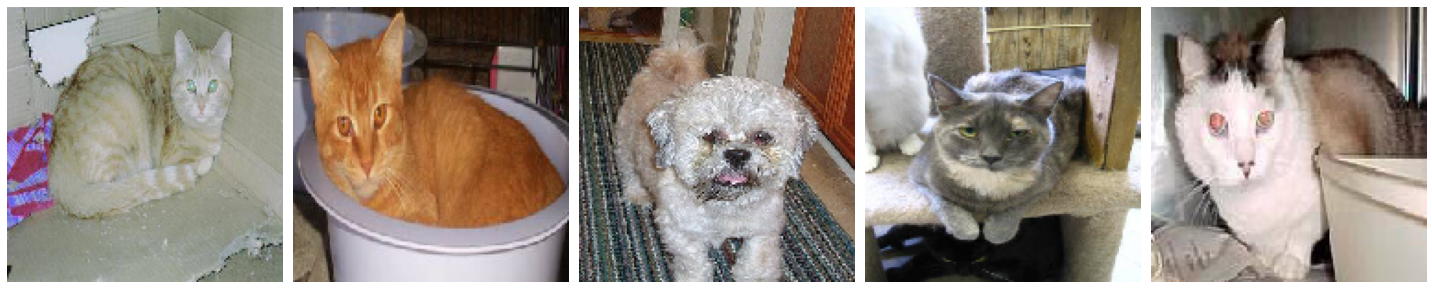

In [ ]:
plot_images(sample_training_images[:5])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', strides=(2, 2), input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    #MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu', strides=(2, 2)),
    #MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu', strides = (2, 2)),
    #MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               11829760  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 11,853,857
Trainable params: 11,853,857
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 8s 524ms/step - loss: 0.9471 - accuracy: 0.4904 - val_loss: 0.6918 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 8s 536ms/step - loss: 0.6910 - accuracy: 0.4995 - val_loss: 0.6870 - val_accuracy: 0.5067
Epoch 3/15
15/15 [==============================] - 8s 540ms/step - loss: 0.6790 - accuracy: 0.5043 - val_loss: 0.6642 - val_accuracy: 0.5112
Epoch 4/15
15/15 [==============================] - 8s 522ms/step - loss: 0.6296 - accuracy: 0.6000 - val_loss: 0.6367 - val_accuracy: 0.5480
Epoch 5/15
15/15 [==============================] - 8s 520ms/step - loss: 0.5835 - accuracy: 0.6432 - val_loss: 0.6413 - val_accuracy: 0.5547
Epoch 6/15
15/15 [==============================] - 8s 520ms/step - loss: 0.5262 - accuracy: 0.7078 - val_loss: 0.6099 - val_accuracy: 0.6462
Epoch 7/15
15/15 [==============================] - 8s 518ms/step - loss: 0.4588 - accuracy: 0.7762 - val_loss: 0.5929 - val_accuracy: 0.6618
Epoch 

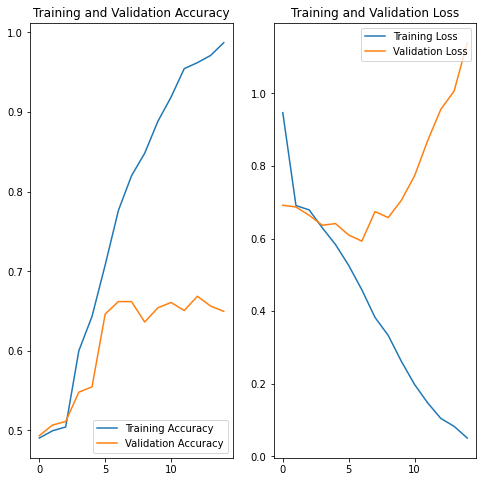

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Data Augmentation to avoid Overfitting

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

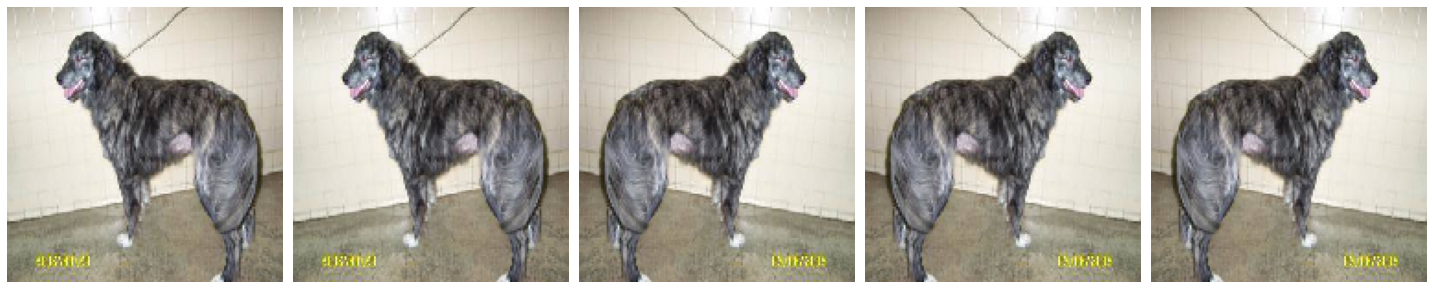

In [ ]:
plot_images(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


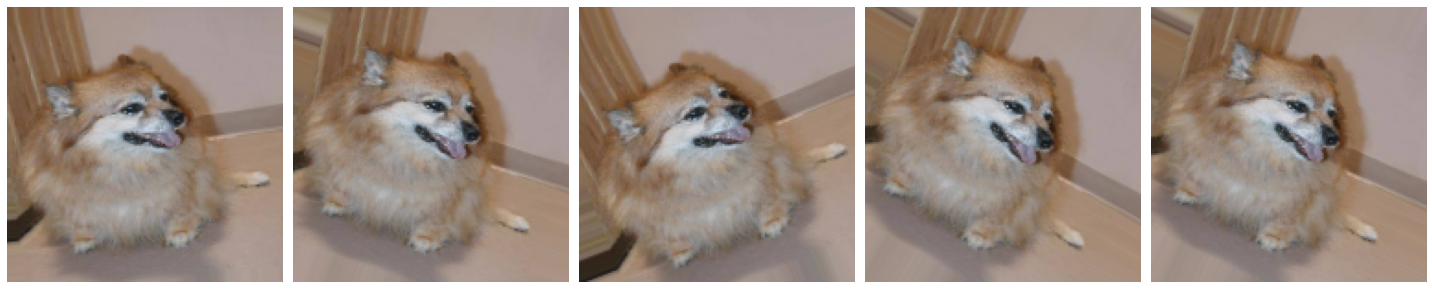

In [ ]:
plot_images(augmented_images)

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


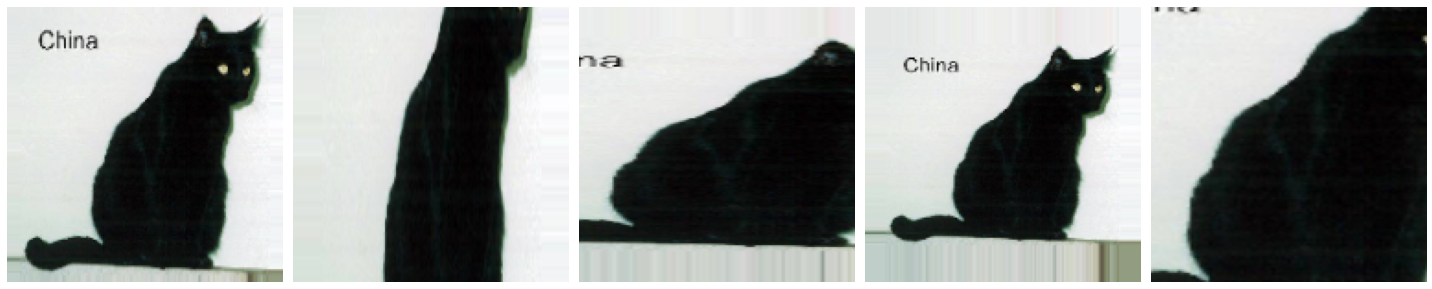

In [ ]:
plot_images(augmented_images)

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


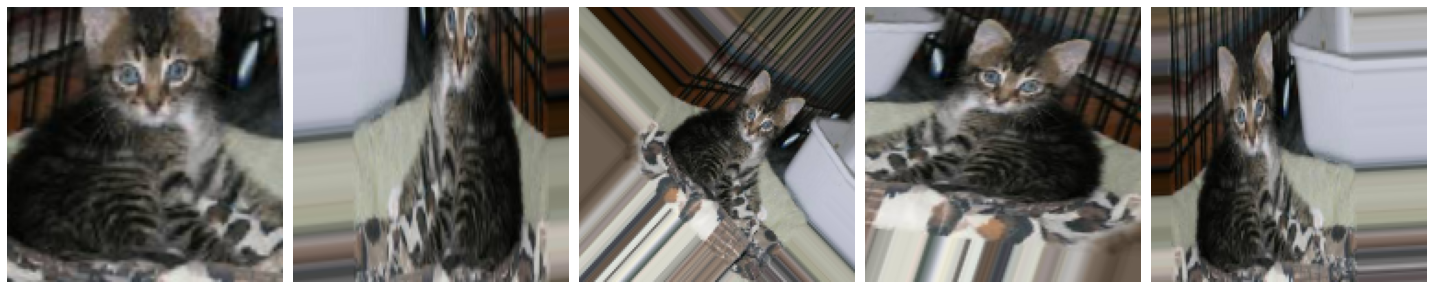

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

Validierungs Images und Data Generator

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


Dropout

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', strides=(2, 2), input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Conv2D(32, 3, padding='same', activation='relu', strides=(2, 2)),
    Conv2D(64, 3, padding='same', activation='relu', strides = (2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 75, 75, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 38, 38, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 23104)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               11829760  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [ ]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 16s 1s/step - loss: 0.7276 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4955
Epoch 2/15
15/15 [==============================] - 16s 1s/step - loss: 0.6880 - accuracy: 0.5085 - val_loss: 0.6897 - val_accuracy: 0.5056
Epoch 3/15
15/15 [==============================] - 16s 1s/step - loss: 0.6871 - accuracy: 0.5219 - val_loss: 0.6760 - val_accuracy: 0.5312
Epoch 4/15
15/15 [==============================] - 16s 1s/step - loss: 0.6762 - accuracy: 0.5411 - val_loss: 0.6579 - val_accuracy: 0.5893
Epoch 5/15
15/15 [==============================] - 16s 1s/step - loss: 0.6617 - accuracy: 0.5577 - val_loss: 0.6718 - val_accuracy: 0.6217
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6619 - accuracy: 0.5545 - val_loss: 0.6637 - val_accuracy: 0.5413
Epoch 7/15
15/15 [==============================] - 16s 1s/step - loss: 0.6653 - accuracy: 0.5550 - val_loss: 0.6526 - val_accuracy: 0.6161
Epoch 8/15
15/15 [==

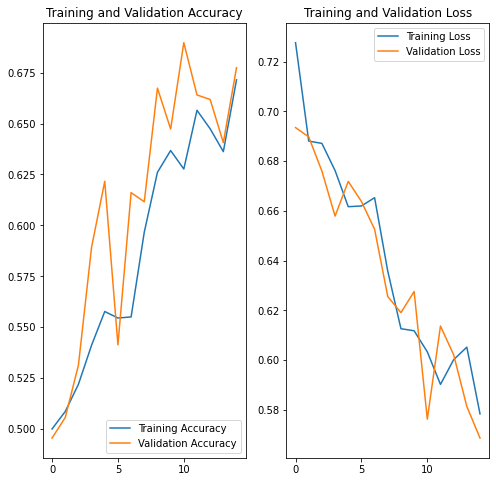

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()